In [1]:
import pandas as pd
import numpy as np
import datetime
import os
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

In [2]:
# folder for all the graphs
graphs_directory = os.path.dirname('./graphs/')
if not os.path.exists(graphs_directory):
    os.makedirs(graphs_directory)
    print("made a directory for graphs")

In [3]:
train_data = pd.read_csv('./data/preprocessed_train_data.csv')
test_data = pd.read_csv('./data/preprocessed_test_data.csv')

# Analyze Train Data

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 53 columns):
Unnamed: 0                           913000 non-null int64
date                                 913000 non-null object
store                                913000 non-null int64
item                                 913000 non-null int64
sales                                913000 non-null int64
year                                 913000 non-null int64
month                                913000 non-null int64
day                                  913000 non-null int64
weekday                              913000 non-null int64
day_of_year                          913000 non-null int64
week_of_year                         913000 non-null int64
isWeekend                            913000 non-null int64
isHoliday                            913000 non-null int64
store_sales_sum                      913000 non-null int64
store_sales_median                   913000 non-null int64
sto

In [22]:
date_cols = ['year', 'month', 'day', 'day_of_year', 'week_of_year', 'isWeekend', 'isHoliday', 'weekday']

In [51]:
train_data[date_cols].describe()

,year,month,day,day_of_year,week_of_year,isWeekend,isHoliday,weekday
count,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.0,913000.000000,913000.000000
mean,2015.000548,6.523549,15.727820,183.100219,26.615553,0.0,0.027382,3.001643
std,1.414021,3.448535,8.799329,105.424201,15.060967,0.0,0.163195,1.999316
min,2013.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,92.000000,14.000000,0.0,0.000000,1.000000
50%,2015.000000,7.000000,16.000000,183.000000,27.000000,0.0,0.000000,3.000000
75%,2016.000000,10.000000,23.000000,274.000000,40.000000,0.0,0.000000,5.000000
max,2017.000000,12.000000,31.000000,366.000000,53.000000,0.0,1.000000,6.000000


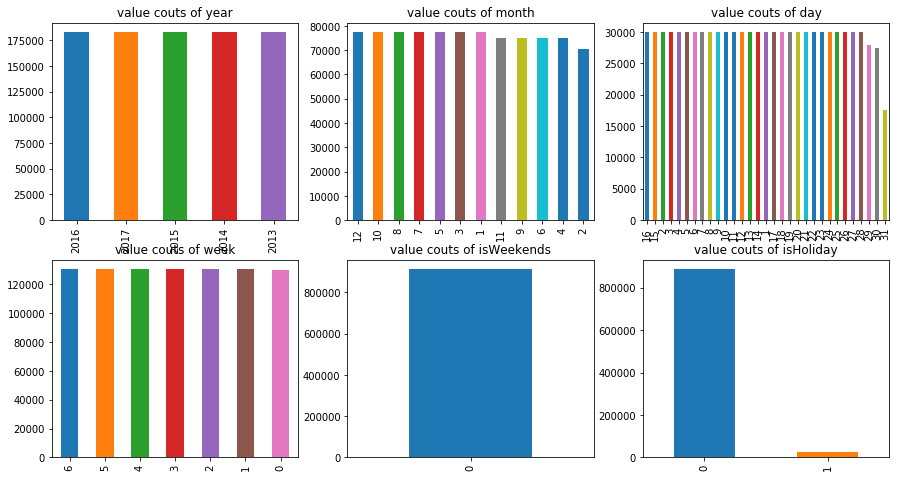

In [40]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
train_data['year'].value_counts().plot.bar(ax=axes[0,0], title='value couts of year', )
train_data['month'].value_counts().plot.bar(ax=axes[0,1], title='value couts of month', )
train_data['day'].value_counts().plot.bar(ax=axes[0,2], title='value couts of day', )
train_data['weekday'].value_counts().plot.bar(ax=axes[1,0], title='value couts of week', )
train_data['isWeekend'].value_counts().plot.bar(ax=axes[1,1], title='value couts of isWeekends', )
train_data['isHoliday'].value_counts().plot.bar(ax=axes[1,2], title='value couts of isHoliday', )

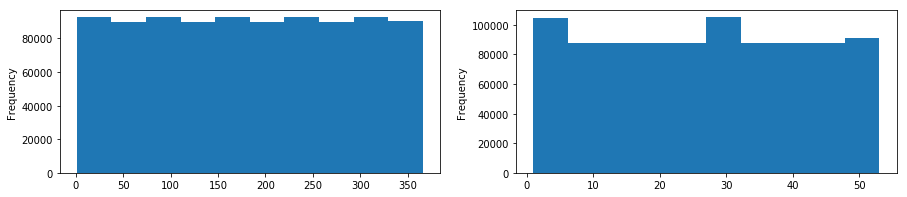

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))
train_data['day_of_year'].plot.hist(ax=axes[0])
train_data['week_of_year'].plot.hist(ax=axes[1])

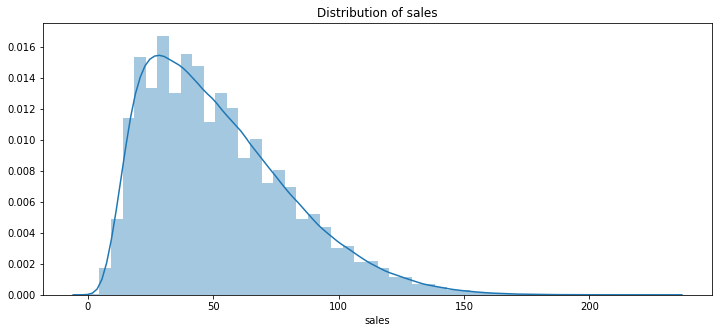

In [81]:
plt.figure(figsize=(12,5))
plt.title('Distribution of sales')
sns.distplot(train_data['sales'])

## Plotting time Columns with Sales

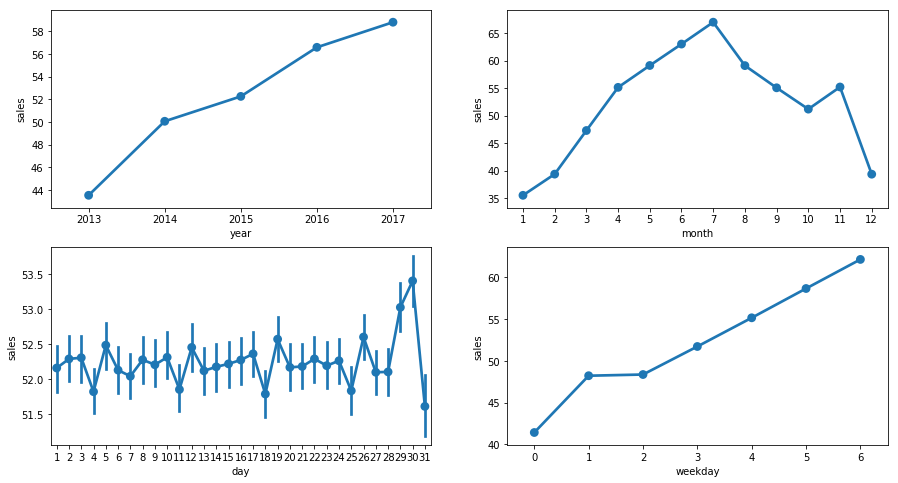

In [58]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
sns.pointplot(x='year', y='sales', data=train_data, ax=axes[0,0])
sns.pointplot(x='month', y='sales', data=train_data, ax=axes[0,1])
sns.pointplot(x='day', y='sales', data=train_data, ax=axes[1,0])
sns.pointplot(x='weekday', y='sales', data=train_data, ax=axes[1,1])

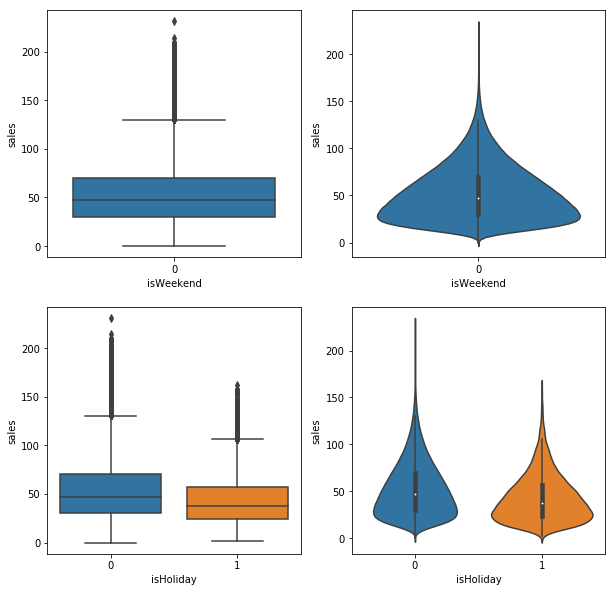

In [77]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
# isWeekend column
sns.boxplot(x='isWeekend', y='sales', data=train_data, ax=axes[0,0])
sns.violinplot(x='isWeekend', y='sales', data=train_data, ax=axes[0,1])

# isHoliday column
sns.boxplot(x='isHoliday', y='sales', data=train_data, ax=axes[1,0])
sns.violinplot(x='isHoliday', y='sales', data=train_data, ax=axes[1,1])
# fig.savefig('./graphs/isWeekend_isHoliday_box_violin_plot.png')

## Plotting Store Columns with Sales

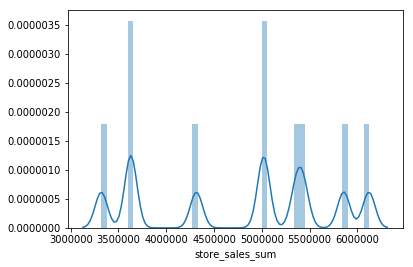

In [79]:
sns.distplot(train_data['store_sales_sum'])

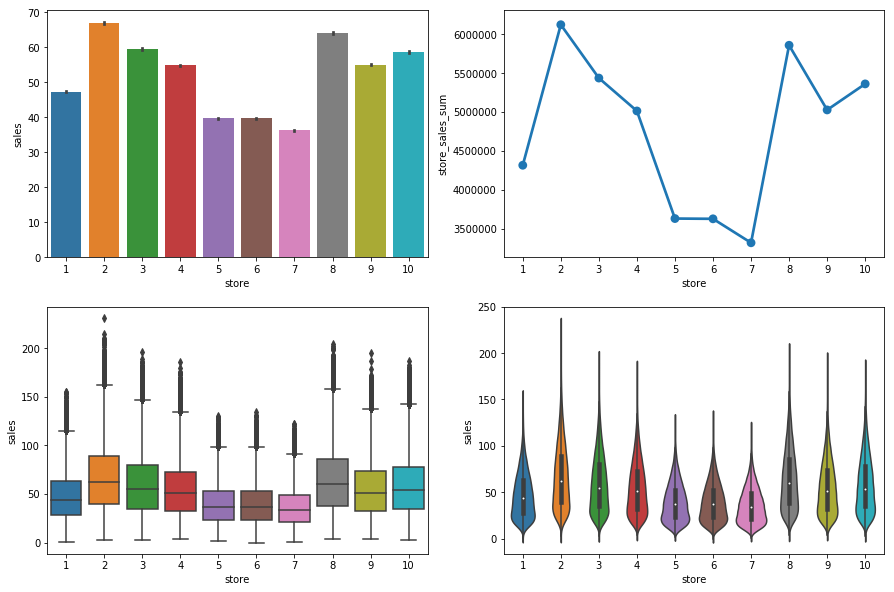

In [60]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.barplot(x='store', y='sales', data=train_data, ax=axes[0,0])
sns.pointplot(x='store', y='store_sales_sum', data=train_data, ax=axes[0,1])
sns.boxplot(x='store', y='sales', data=train_data, ax=axes[1,0])
sns.violinplot(x='store', y='sales', data=train_data, ax=axes[1,1])

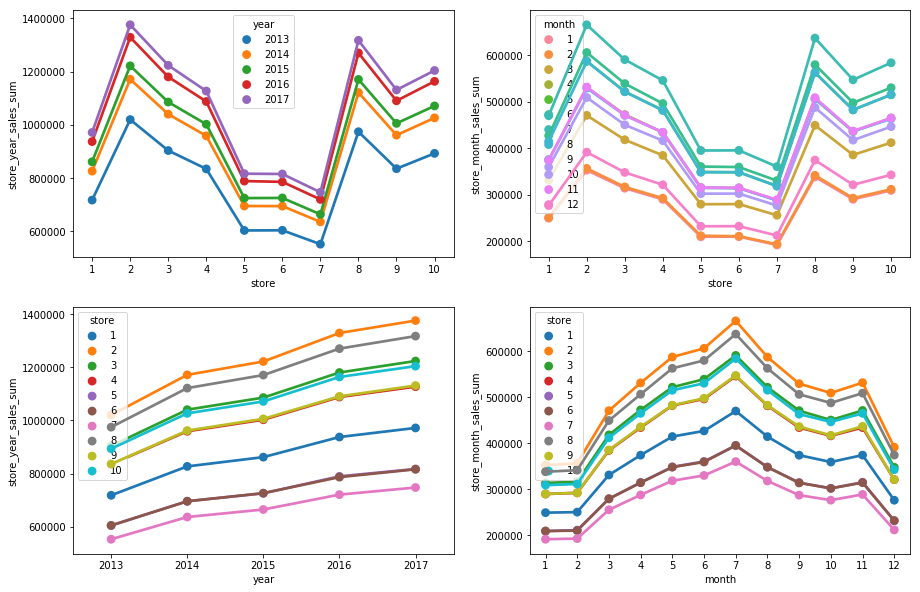

In [72]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.pointplot(x='store', y='store_year_sales_sum', hue='year', data=train_data, ax=axes[0,0])
sns.pointplot(x='store', y='store_month_sales_sum', hue='month', data=train_data, ax=axes[0,1])
sns.pointplot(x='year', y='store_year_sales_sum', hue='store', data=train_data, ax=axes[1,0])
sns.pointplot(x='month', y='store_month_sales_sum', hue='store', data=train_data, ax=axes[1,1])

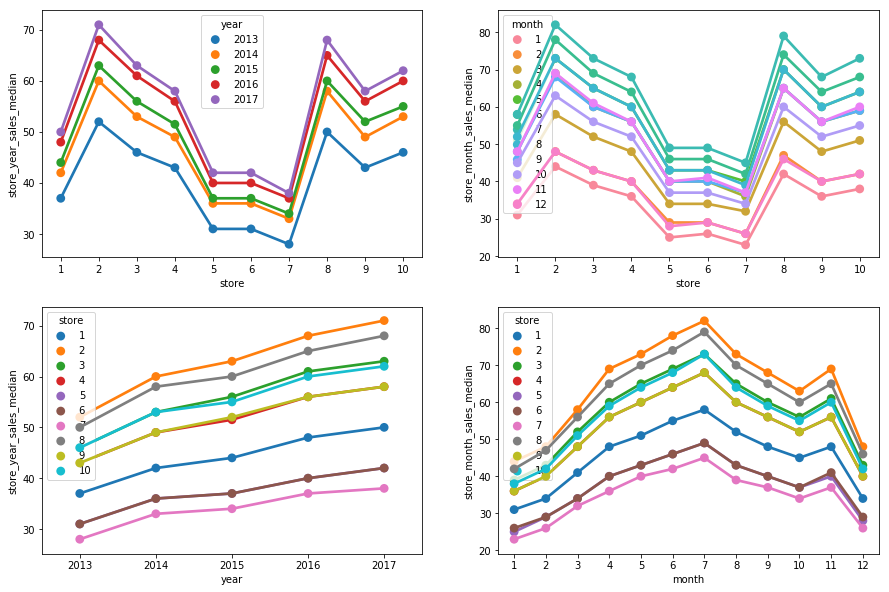

In [73]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.lineplot(x='store', y='store_year_sales_median', hue='year', data=train_data, ax=axes[0,0])
sns.lineplot(x='store', y='store_month_sales_median', hue='month', data=train_data, ax=axes[0,1])
sns.lineplot(x='year', y='store_year_sales_median', hue='store', data=train_data, ax=axes[1,0])
sns.lineplot(x='month', y='store_month_sales_median', hue='store', data=train_data, ax=axes[1,1])

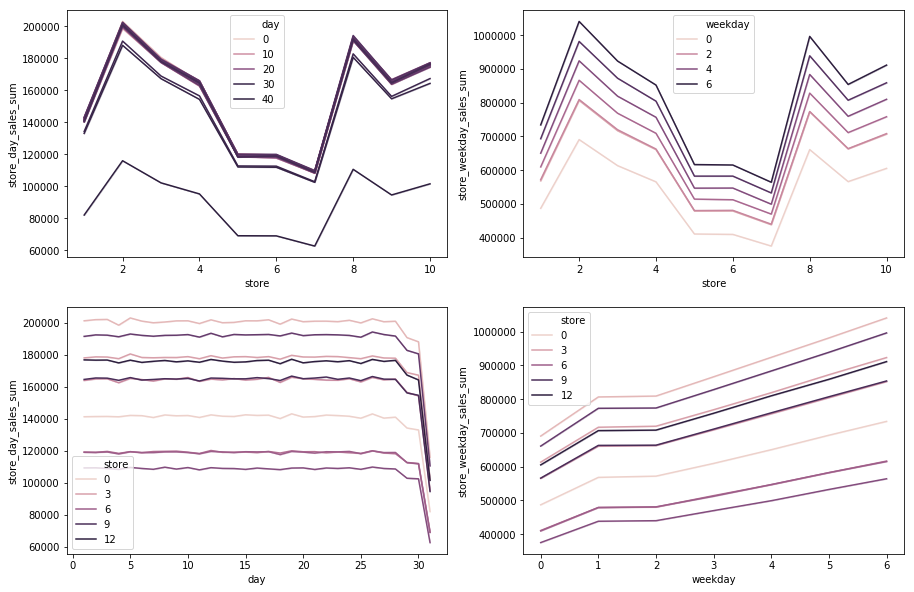

In [101]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.lineplot(x='store', y='store_day_sales_sum', hue='day', data=train_data, ax=axes[0,0])
sns.lineplot(x='store', y='store_weekday_sales_sum', hue='weekday', data=train_data, ax=axes[0,1])
sns.lineplot(x='day', y='store_day_sales_sum', hue='store', data=train_data, ax=axes[1,0])
sns.lineplot(x='weekday', y='store_weekday_sales_sum', hue='store', data=train_data, ax=axes[1,1])

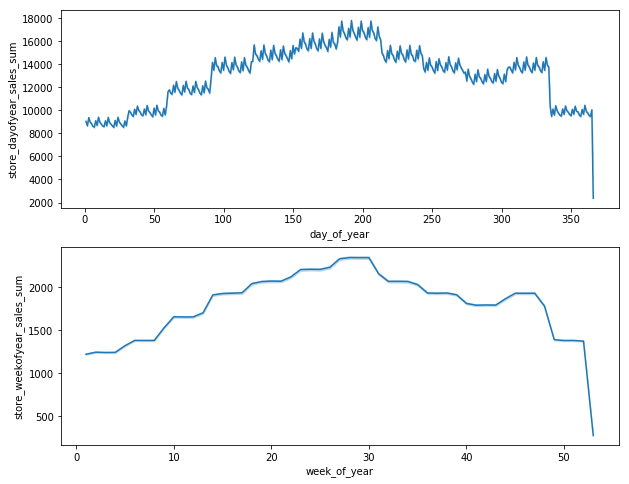

In [105]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
sns.lineplot(x='day_of_year', y='store_dayofyear_sales_sum', data=train_data, ax=axes[0])
sns.lineplot(x='week_of_year', y='store_weekofyear_sales_sum', data=train_data, ax=axes[1])

# Plotting item Colum with Sales

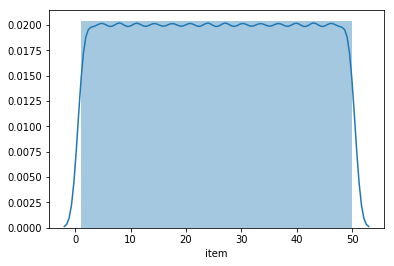

In [80]:
sns.distplot(train_data['item'])

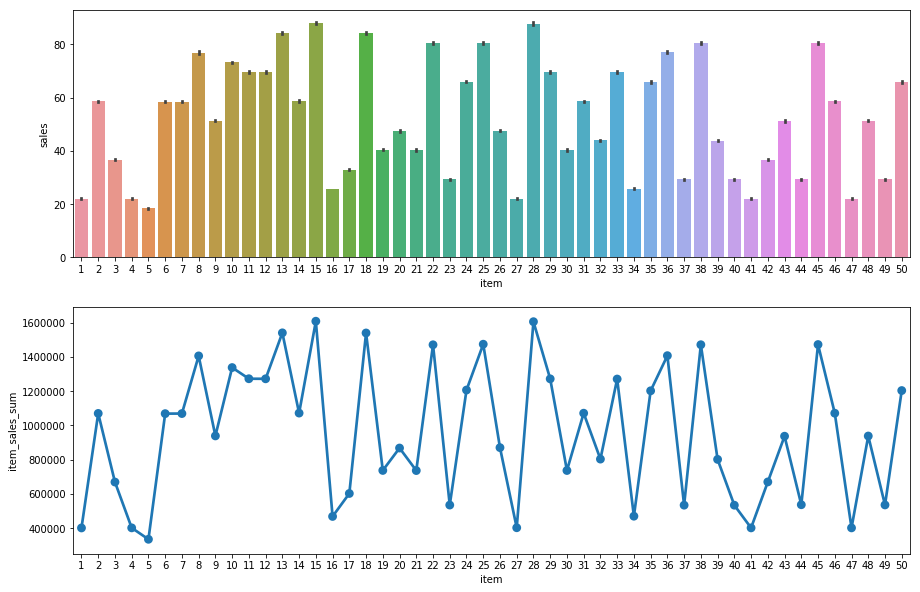

In [85]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
sns.barplot(x='item', y='sales', data=train_data, ax=axes[0])
sns.pointplot(x='item', y='item_sales_sum', data=train_data, ax=axes[1])

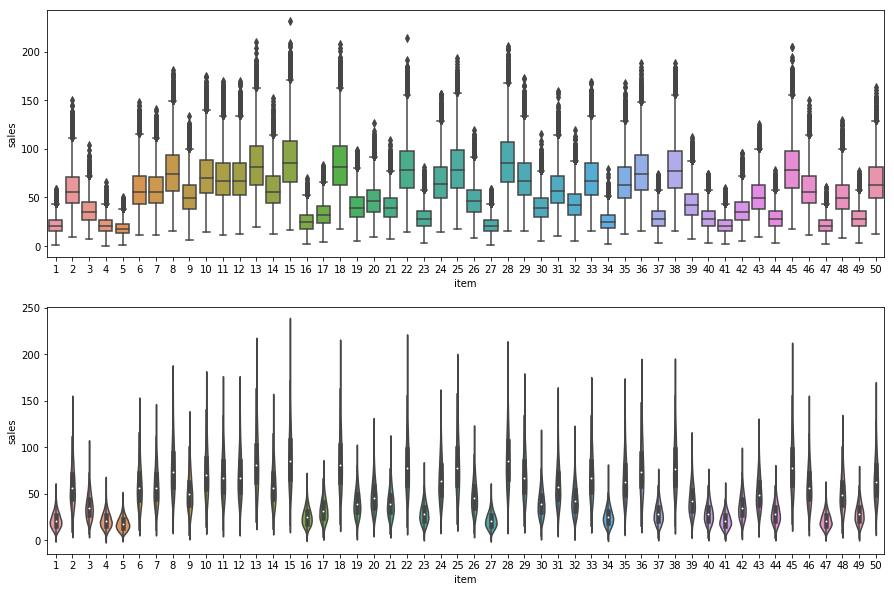

In [86]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
sns.boxplot(x='item', y='sales', data=train_data, ax=axes[0])
sns.violinplot(x='item', y='sales', data=train_data, ax=axes[1])

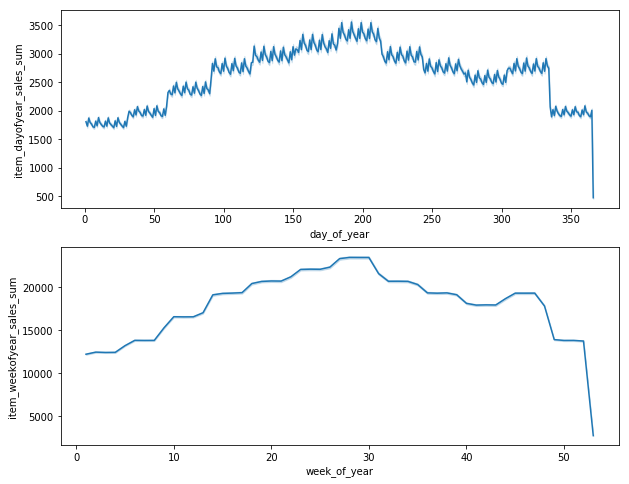

In [104]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
sns.lineplot(x='day_of_year', y='item_dayofyear_sales_sum', data=train_data, ax=axes[0])
sns.lineplot(x='week_of_year', y='item_weekofyear_sales_sum', data=train_data, ax=axes[1])

# Plotting store-item Columns with Sales

In [132]:
train_data.columns.tolist()

['Unnamed: 0',
 'date',
 'store',
 'item',
 'sales',
 'year',
 'month',
 'day',
 'weekday',
 'day_of_year',
 'week_of_year',
 'isWeekend',
 'isHoliday',
 'store_sales_sum',
 'store_sales_median',
 'store_year_sales_sum',
 'store_year_sales_median',
 'store_month_sales_sum',
 'store_month_sales_median',
 'store_day_sales_sum',
 'store_day_sales_median',
 'store_weekday_sales_sum',
 'store_weekday_sales_median',
 'store_dayofyear_sales_sum',
 'store_dayofyear_sales_median',
 'store_weekofyear_sales_sum',
 'store_weekofyear_sales_median',
 'item_sales_sum',
 'item_sales_median',
 'item_year_sales_sum',
 'item_year_sales_median',
 'item_month_sales_sum',
 'item_month_sales_median',
 'item_day_sales_sum',
 'item_day_sales_median',
 'item_weekday_sales_sum',
 'item_weekday_sales_median',
 'item_dayofyear_sales_sum',
 'item_dayofyear_sales_median',
 'item_weekofyear_sales_sum',
 'item_weekofyear_sales_median',
 'sotre_item_sales_sum',
 'store_item_sales_median',
 'store_item_year_sales_sum',


In [137]:
features_will_use = np.delete(train_data.columns, [0, 1, 2, 11])
half_the_features = features_will_use[:int(len(features_will_use) /2)]
other_half_features = features_will_use[int(len(features_will_use) /2):]

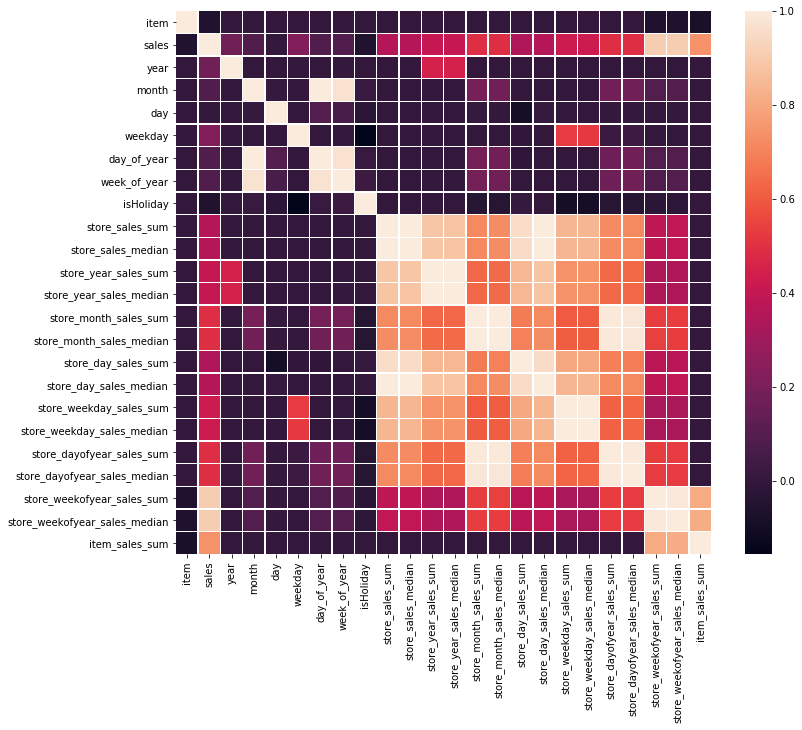

In [136]:
plt.figure(figsize=(12,10))
sns.heatmap(train_data[half_the_features].corr(),
           linewidths=.4, 
           annot=False, 
           annot_kws={'fontsize':10 })

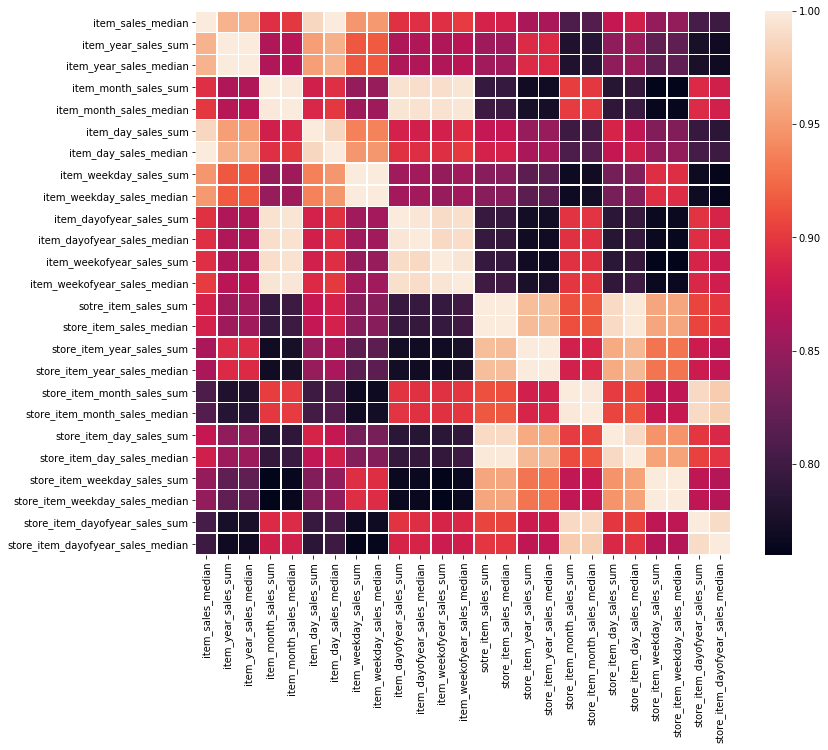

In [139]:
plt.figure(figsize=(12,10))
sns.heatmap(train_data[other_half_features].corr(),
           linewidths=.4, 
           annot=False, 
           annot_kws={'fontsize':10 })